In [1]:
import mlreflect
print('Tested with mlreflect version: ' + mlreflect.__version__)
from mlreflect.utils import check_gpu
check_gpu() # Checks if a GPU on the current machine is available
import matplotlib.pyplot as plt
import numpy as np
from mlreflect.curve_fitter import example_ascii_file_path, DefaultSpecFitter
from mlreflect.data_generation import Layer, Substrate, AmbientLayer, MultilayerStructure
from mlreflect.models import TrainedModel

Tested with mlreflect version: 0.21.1
[]


In [2]:
from mlreflect.training import Trainer
from mlreflect.data_generation import ReflectivityGenerator
from mlreflect.curve_fitter import CurveFitter

In [3]:
my_trained_model = TrainedModel()
my_trained_model.from_file("Trained_model.h5")

curve_fitter = CurveFitter(my_trained_model)

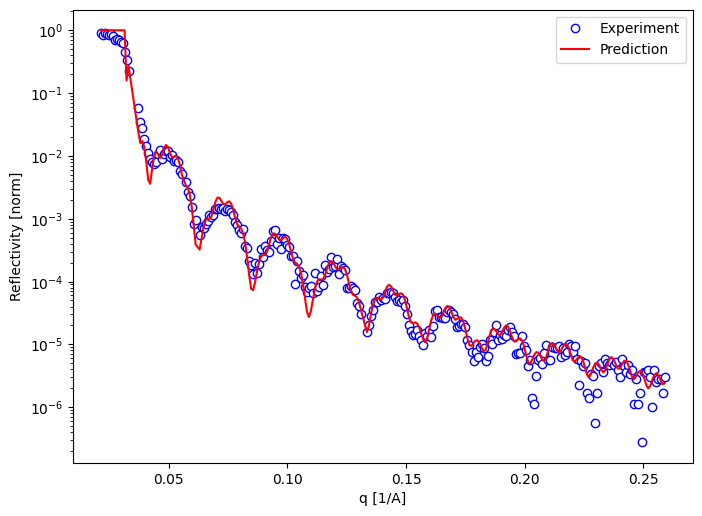

   SiOx_thickness  Film_thickness  Si_roughness  SiOx_roughness  \
0             992      263.089075           1.1             2.6   

   Film_roughness  Si_sld  SiOx_sld  Film_sld  ambient_sld  
0        8.397998   19.83    18.709  7.667113            0  


In [4]:
###check
experiment = np.loadtxt("data/data574.txt")
experiment_data = experiment[:,:]

experimental_intensity = experiment_data[:,1]
q_exp = experiment_data[:,0]

experimental_fit_output = curve_fitter.fit_curve(experimental_intensity, q_exp, polish=True, optimize_q=False, optimize_scaling=True)
pred_experimental_reflectivity = experimental_fit_output['predicted_reflectivity']
pred_experimental_test_labels = experimental_fit_output['predicted_parameters']

fig = plt.figure(dpi = 100, figsize = (8, 6))
plt.semilogy(q_exp, experimental_intensity, 'o', markerfacecolor = "white", markeredgecolor = "blue", label = "Experiment")
plt.semilogy(q_exp, pred_experimental_reflectivity[0], label = "Prediction", color="red")
plt.legend()
plt.xlabel("q [1/A]")
plt.ylabel("Reflectivity [norm]")
plt.show()

print(pred_experimental_test_labels)

time1= (127,) time2= (130,) time3= (80,)
(337, 1)


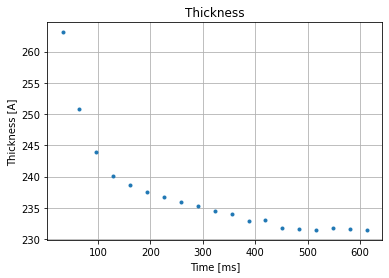

In [5]:
result= np.load('result_spin.npy', allow_pickle=True)
time = np.load('t_spin.npy', allow_pickle=True)

print('time1=', time[0].shape, 'time2=', time[1].shape,'time3=', time[2].shape)
print(result[1].shape)

plt.plot(time[0][1:20],result[0][1:20], '.')
plt.title('Thickness')
plt.xlabel("Time [ms]")
plt.ylabel("Thickness [A]")
plt.grid()
plt.show()

(49,)
(49,)
R² = 0.9671200424067847
Y = 39.94363813970966 * e^(-0.00941139502051804 * x) + 230.6831862400368
Tau = 106.25417356511682 ms


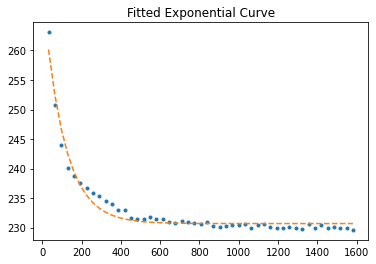

In [6]:
import scipy
xs = time[0][1:50]
 
# Points on Y-axis
ys = result[0][1:50]
ys = ys.reshape(49)

print(ys.shape)
print(xs.shape)
 
def monoExp(x, m, t, b):
    return m * np.exp(-t * x) + b

# perform the fit
p0 = (400, 0.1, 61) # start with values near those we expect
params, cv = scipy.optimize.curve_fit(monoExp, xs, ys, p0)
m, t, b = params
sampleRate = 20_000 # Hz
tauSec = (1 / t)

# determine quality of the fit
squaredDiffs = np.square(ys - monoExp(xs, m, t, b))
squaredDiffsFromMean = np.square(ys - np.mean(ys))
rSquared = 1 - np.sum(squaredDiffs) / np.sum(squaredDiffsFromMean)
print(f"R² = {rSquared}")

# plot the results
plt.plot(xs, ys, '.', label="data")
plt.plot(xs, monoExp(xs, m, t, b), '--', label="fitted")
plt.title("Fitted Exponential Curve")

# inspect the parameters
print(f"Y = {m} * e^(-{t} * x) + {b}")
print(f"Tau = {tauSec} ms")

In [7]:
def fitting(file_name):
    experiment = np.loadtxt(file_name)
    experiment_data = experiment[:,:]

    experimental_intensity = experiment_data[:,1]
    q_exp = experiment_data[:,0]

    experimental_fit_output = curve_fitter.fit_curve(experimental_intensity, q_exp, polish=True, optimize_q=False, optimize_scaling=True)
    pred_experimental_reflectivity = experimental_fit_output['predicted_reflectivity']
    pred_experimental_test_labels = experimental_fit_output['predicted_parameters']

    return q_exp, experimental_intensity, pred_experimental_reflectivity[0]

fit0 = fitting("data/data574.txt")
fit1 = fitting("data/data576.txt")
fit2 = fitting("data/data578.txt")
fit3 = fitting("data/data580.txt")
fit4 = fitting("data/data585.txt")

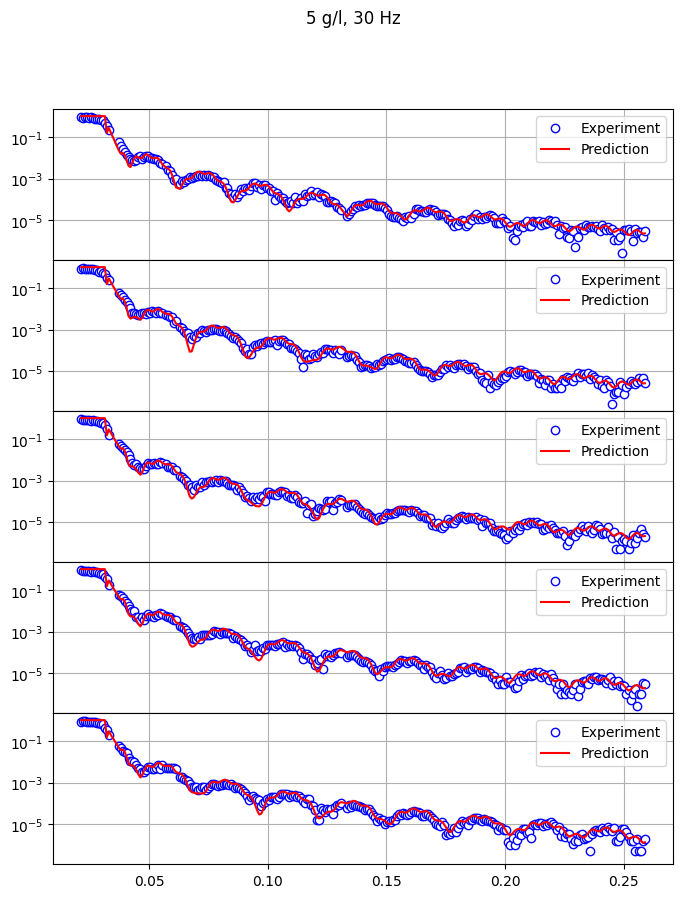

In [8]:
fig = plt.figure(dpi = 100, figsize = (8, 10))
gs = fig.add_gridspec(5, hspace=0)
axs = gs.subplots(sharex=True, sharey=True)
fig.suptitle('5 g/l, 30 Hz')
axs[0].plot(fit0[0], fit0[1], 'o', markerfacecolor = "white", markeredgecolor = "blue", label = "Experiment")
axs[0].plot(fit0[0], fit0[2], label = "Prediction", color="red")
axs[0].legend()
axs[0].grid()
axs[1].plot(fit1[0], fit1[1], 'o', markerfacecolor = "white", markeredgecolor = "blue", label = "Experiment")
axs[1].plot(fit1[0], fit1[2], label = "Prediction", color="red")
axs[1].legend()
axs[1].grid()
axs[2].plot(fit2[0], fit2[1], 'o', markerfacecolor = "white", markeredgecolor = "blue", label = "Experiment")
axs[2].plot(fit2[0], fit2[2], label = "Prediction", color="red")
axs[2].legend()
axs[2].grid()
axs[3].plot(fit3[0], fit3[1], 'o', markerfacecolor = "white", markeredgecolor = "blue", label = "Experiment")
axs[3].plot(fit3[0], fit3[2], label = "Prediction", color="red")
axs[3].legend()
axs[3].grid()
axs[4].plot(fit4[0], fit4[1], 'o', markerfacecolor = "white", markeredgecolor = "blue", label = "Experiment")
axs[4].plot(fit4[0], fit4[2], label = "Prediction", color="red")
axs[4].legend()
axs[4].grid()

plt.yscale('log')


# Hide x labels and tick labels for all but bottom plot.
for ax in axs:
    ax.label_outer()